# **Student Performance model**
This is a practice run at producing a model that can predict the future performance of students mathematics scores based on various factors.

In [182]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## **Step 1. Importing and examining the data**

In [183]:
file_path = os.getcwd() + "/student-mat.csv"


df = pd.read_csv(file_path, sep=";") 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [184]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


We only have 395 rows in this dataset. This may or may not be an issue

In [185]:
# Return a list of all the columns with nAn values. None of the columns have nAn values
list(df.columns[df.isnull().sum() > 0])

[]

In [186]:
# We have 33 total columns
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

All columns are either int64 or object
Quick description of columns:


<table class="table my-4 w-full"><thead><tr><th>Variable Name</th><th>Role</th><th>Type</th><th>Demographic</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>school</td><td>Feature</td><td>Categorical</td><td></td><td>student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</td><td></td><td>no</td> </tr><tr><td>sex</td><td>Feature</td><td>Binary</td><td>Sex</td><td>student's sex (binary: 'F' - female or 'M' - male)</td><td></td><td>no</td> </tr><tr><td>age</td><td>Feature</td><td>Integer</td><td>Age</td><td>student's age (numeric: from 15 to 22)</td><td></td><td>no</td> </tr><tr><td>address</td><td>Feature</td><td>Categorical</td><td></td><td>student's home address type (binary: 'U' - urban or 'R' - rural)</td><td></td><td>no</td> </tr><tr><td>famsize</td><td>Feature</td><td>Categorical</td><td>Other</td><td>family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</td><td></td><td>no</td> </tr><tr><td>Pstatus</td><td>Feature</td><td>Categorical</td><td>Other</td><td>parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</td><td></td><td>no</td> </tr><tr><td>Medu</td><td>Feature</td><td>Integer</td><td>Education Level</td><td>mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)</td><td></td><td>no</td> </tr><tr><td>Fedu</td><td>Feature</td><td>Integer</td><td>Education Level</td><td>father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)</td><td></td><td>no</td> </tr><tr><td>Mjob</td><td>Feature</td><td>Categorical</td><td>Occupation</td><td>mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</td><td></td><td>no</td> </tr><tr><td>Fjob</td><td>Feature</td><td>Categorical</td><td>Occupation</td><td>father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</td><td></td><td>no</td> </tr><tr><td>reason</td><td>Feature</td><td>Categorical</td><td></td><td>reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</td><td></td><td>no</td> </tr><tr><td>guardian</td><td>Feature</td><td>Categorical</td><td></td><td>student's guardian (nominal: 'mother', 'father' or 'other')</td><td></td><td>no</td> </tr><tr><td>traveltime</td><td>Feature</td><td>Integer</td><td></td><td>home to school travel time (numeric: 1 - &lt;15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - &gt;1 hour)</td><td></td><td>no</td> </tr><tr><td>studytime</td><td>Feature</td><td>Integer</td><td></td><td>weekly study time (numeric: 1 - &lt;2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - &gt;10 hours)</td><td></td><td>no</td> </tr><tr><td>failures</td><td>Feature</td><td>Integer</td><td></td><td>number of past class failures (numeric: n if 1&lt;=n&lt;3, else 4)</td><td></td><td>no</td> </tr><tr><td>schoolsup</td><td>Feature</td><td>Binary</td><td></td><td>extra educational support (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>famsup</td><td>Feature</td><td>Binary</td><td></td><td>family educational support (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>paid</td><td>Feature</td><td>Binary</td><td></td><td>extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>activities</td><td>Feature</td><td>Binary</td><td></td><td>extra-curricular activities (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>nursery</td><td>Feature</td><td>Binary</td><td></td><td>attended nursery school (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>higher</td><td>Feature</td><td>Binary</td><td></td><td>wants to take higher education (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>internet</td><td>Feature</td><td>Binary</td><td></td><td>Internet access at home (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>romantic</td><td>Feature</td><td>Binary</td><td></td><td>with a romantic relationship (binary: yes or no)</td><td></td><td>no</td> </tr><tr><td>famrel</td><td>Feature</td><td>Integer</td><td></td><td>quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</td><td></td><td>no</td> </tr><tr><td>freetime</td><td>Feature</td><td>Integer</td><td></td><td>free time after school (numeric: from 1 - very low to 5 - very high)</td><td></td><td>no</td> </tr><tr><td>goout</td><td>Feature</td><td>Integer</td><td></td><td>going out with friends (numeric: from 1 - very low to 5 - very high)</td><td></td><td>no</td> </tr><tr><td>Dalc</td><td>Feature</td><td>Integer</td><td></td><td>workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</td><td></td><td>no</td> </tr><tr><td>Walc</td><td>Feature</td><td>Integer</td><td></td><td>weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</td><td></td><td>no</td> </tr><tr><td>health</td><td>Feature</td><td>Integer</td><td></td><td>current health status (numeric: from 1 - very bad to 5 - very good)</td><td></td><td>no</td> </tr><tr><td>absences</td><td>Feature</td><td>Integer</td><td></td><td>number of school absences (numeric: from 0 to 93)</td><td></td><td>no</td> </tr></tbody></table>


<table class="table my-4 w-full"><thead><tr><th>Variable Name</th><th>Role</th><th>Type</th><th>Demographic</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>G1</td><td>Target</td><td>Categorical</td><td></td><td>first period grade (numeric: from 0 to 20)</td><td></td><td>no</td> </tr><tr><td>G2</td><td>Target</td><td>Categorical</td><td></td><td>second period grade (numeric: from 0 to 20)</td><td></td><td>no</td> </tr><tr><td>G3</td><td>Target</td><td>Integer</td><td></td><td>final grade (numeric: from 0 to 20, output target)</td><td></td><td>no</td> </tr></tbody></table>


In [187]:
# Regularize the column names 
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [188]:
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Let's have a look at the targets and see what we're working with

<Axes: xlabel='g3', ylabel='Count'>

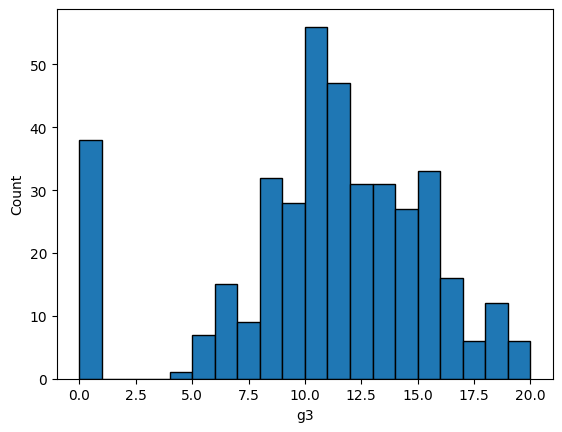

In [189]:
sns.histplot(df.g3, bins=20, alpha=1) 

In [190]:
# First, prepare a model with only integer columns. Then prepare a model using all columns
df_ints = df.select_dtypes(exclude="object")

# **Step 2 - Split the data into training, validation and testing**

In [191]:
# But first, we need to shuffle the data
n = len(df)
n

395

In [192]:
# We have 395 rows. Use 70% for training, 15% for validation, 15% for testing
n_val = (int)(n * 0.15)
n_test = (int)(n * 0.15)
n_train = n - n_val - n_test
n_train, n_val, n_test, n_train + n_val + n_test

(277, 59, 59, 395)

In [193]:
# Generate a randomized list of indexes. We will use these indexes to select data for training, testing, and validation
indexes = np.arange(n)
np.random.shuffle(indexes)
indexes[0:10]

array([123, 239, 343, 204, 349, 235, 121, 170, 257, 318])

In [194]:
# Separate the targets from the features
targets = ["g1", "g2", "g3"]

y = df[targets]
y

,g1,g2,g3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


In [195]:
# Delete the targets from the dataframe. We don't want to accidentaly include them in any model training.
for t in targets:
    del df[t]
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [196]:
df_train = df.iloc[indexes[:n_train]]
df_val = df.iloc[indexes[n_train : n_train + n_val]]
df_test = df.iloc[indexes[n_train + n_val : ]]

In [197]:
y_train = y.iloc[indexes[:n_train]]
y_val = y.iloc[indexes[n_train:n_train + n_val]]
y_test = y.iloc[indexes[n_train + n_val:]]

In [198]:
df_train.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences
123,GP,M,16,U,GT3,T,4,4,health,other,...,yes,yes,no,3,4,4,1,4,5,18
239,GP,M,18,U,GT3,T,2,2,other,services,...,no,yes,no,5,5,4,3,5,2,0
343,GP,F,17,U,GT3,A,2,2,at_home,at_home,...,yes,yes,yes,3,3,1,1,2,4,0
204,GP,F,16,R,GT3,T,2,2,services,services,...,yes,yes,no,5,3,5,1,1,5,6
349,MS,M,18,R,GT3,T,3,2,other,other,...,yes,yes,no,2,5,5,5,5,5,10


In [199]:
df_val.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,16.694915,2.745763,2.559322,1.389831,2.016949,0.474576,4.000000,3.288136,3.067797,1.457627,2.135593,3.440678,5.305085
std,1.342338,1.027102,1.054893,0.557610,0.819830,0.858144,0.830455,0.788951,0.887935,0.857463,1.074110,1.417516,5.414713
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.500000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,1.000000,4.500000,4.000000,4.000000,2.000000,3.000000,5.000000,7.500000
max,21.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,25.000000


In [200]:
df_test.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences
count,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,16.762712,2.694915,2.593220,1.40678,2.067797,0.271186,4.033898,3.271186,3.220339,1.542373,2.271186,3.389831,5.644068
std,1.418340,1.178167,1.190749,0.64644,0.827635,0.611118,0.741994,0.997073,1.130575,1.022540,1.349719,1.508790,7.253448
min,15.000000,0.000000,0.000000,1.00000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15.500000,2.000000,2.000000,1.00000,1.500000,0.000000,4.000000,3.000000,2.500000,1.000000,1.000000,2.000000,0.000000
50%,17.000000,3.000000,3.000000,1.00000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000
75%,18.000000,4.000000,4.000000,2.00000,3.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.00000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,38.000000


In [201]:
int_columns = list(df.columns[df.dtypes != "object"])
int_columns

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences']

## Step 3 - Training a model

$ w = (X^TX)^{-1} . X^T . y $

In [202]:
def prepare_X(df, features):
    X = df[features]
    return X

In [203]:
def train_linear_regression(df, y, features, r):
    X = prepare_X(df, features)
    
    XTX = X.T.dot(X)
    reg_matrix = r * np.eye(XTX.shape[0])
    XTX = XTX + reg_matrix
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w

In [204]:
# w contains 3 columns, hopefully each column is for predicting a different feature: g1, g2, g3
w = train_linear_regression(df_train, y_train, int_columns, 0.01)
w

array([[ 0.47442356,  0.44087832,  0.31309794],
       [ 0.52158027,  0.77573898,  1.06279313],
       [-0.11588023, -0.17989632, -0.47604807],
       [-0.15274471, -0.27426089, -0.11218151],
       [ 0.50314356,  0.59182184,  0.4012163 ],
       [-1.36719826, -1.52997769, -1.81553052],
       [ 0.19290983,  0.2332136 ,  0.58837607],
       [ 0.50851223,  0.46495074,  0.57418146],
       [-0.35164504, -0.52731865, -0.62029235],
       [-0.16289919,  0.01939561, -0.31008718],
       [ 0.11707225,  0.29521014,  0.52196378],
       [ 0.03608369, -0.00956916,  0.06498686],
       [-0.00671757, -0.02089867,  0.01530256]])

In [205]:
y_pred = prepare_X(df_val, int_columns).dot(w)
y_pred.head()

,0,1,2
364,10.127778,9.702013,8.613139
342,12.031470,11.825870,11.574439
62,10.448279,9.811526,8.937942
67,12.366502,12.518526,12.549739
143,9.438242,9.310077,8.197253


## **Step 4 - RMSE**
$$ RMSE = \sqrt {\frac{1}{m} \sum_{i=1}^{m} (g(x_i) - y_i)^2} $$

In [206]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()

    return np.sqrt(mse)

In [207]:
y_val_g1 = y_val["g1"]
y_val_g1

364    12
342    16
62      8
67      7
143    14
248     3
331    12
93     11
86      8
158    17
111     7
196    17
81     11
84      9
181    12
88     11
139    16
28     11
352     8
114     9
172    13
226    16
392    10
255     7
161     5
85      7
146     6
40      7
209     7
190    11
385    10
330     9
323    12
281    11
244     7
169    14
94     11
5      15
304    15
47     19
179    10
356    12
369    14
42     19
54     10
270     9
193     8
384     6
299    16
376    15
316     8
13     10
274    10
333     8
46     11
150     6
215    14
160     7
119    14
Name: g1, dtype: int64

In [208]:
y_pred_g1 = y_pred[0]
y_pred_g1

364    10.127778
342    12.031470
62     10.448279
67     12.366502
143     9.438242
248    10.800305
331    11.839848
93     11.571543
86     10.262858
158     9.698521
111     9.400567
196    11.189832
81     11.180149
84     10.125800
181    10.561209
88      9.819988
139    10.665285
28     11.088411
352     9.025652
114    11.273335
172    12.309387
226    11.564622
392     9.020192
255     8.938693
161     8.188179
85      8.270194
146     6.664682
40      8.796665
209    13.168423
190    10.341245
385    12.309333
330    13.076303
323    12.627710
281     9.740698
244    12.132378
169    12.231942
94     10.736381
5      12.662796
304    11.044673
47     12.274131
179    11.583532
356    11.855833
369    11.298732
42     10.956093
54      9.579829
270     8.831419
193    10.858431
384    10.882129
299    11.947334
376    11.791793
316    11.710182
13     11.665556
274    10.564700
333    11.473148
46     10.147581
150     5.751157
215    11.709053
160     7.945479
119    10.3010

In [228]:
rmse(y_val_g1, y_pred_g1)

np.float64(3.3216019613326626)

I've run this a few times and I'm getting varying results, likely from changing various things. At the moment, the RMSE is sitting somewhere around 3.0-3.3. Let's see if we can't improve this

In [230]:
r_values = np.arange(35, 37.5, 0.01)
X_val = prepare_X(df_val, int_columns)


errors = []

for r in r_values:
    w = train_linear_regression(df_train, y_train, int_columns, r)

    y_pred_g1 = X_val.dot(w)[0]

    error = rmse(y_val_g1, y_pred_g1)
    errors.append((float)(error))

In [237]:
errors

data={}
for i, r in enumerate(r_values):
    data[r] = errors[i]
data

{np.float64(35.0): 3.3215955976976574,
 np.float64(35.01): 3.3215954913904255,
 np.float64(35.019999999999996): 3.3215953861737346,
 np.float64(35.029999999999994): 3.3215952820472485,
 np.float64(35.03999999999999): 3.321595179010631,
 np.float64(35.04999999999999): 3.3215950770635403,
 np.float64(35.05999999999999): 3.321594976205654,
 np.float64(35.069999999999986): 3.3215948764366274,
 np.float64(35.079999999999984): 3.321594777756125,
 np.float64(35.08999999999998): 3.3215946801638077,
 np.float64(35.09999999999998): 3.3215945836593423,
 np.float64(35.10999999999998): 3.321594488242398,
 np.float64(35.119999999999976): 3.3215943939126404,
 np.float64(35.129999999999974): 3.32159430066973,
 np.float64(35.13999999999997): 3.321594208513328,
 np.float64(35.14999999999997): 3.3215941174430976,
 np.float64(35.15999999999997): 3.32159402745872,
 np.float64(35.169999999999966): 3.321593938559843,
 np.float64(35.179999999999964): 3.3215938507461398,
 np.float64(35.18999999999996): 3.32159

<Axes: >

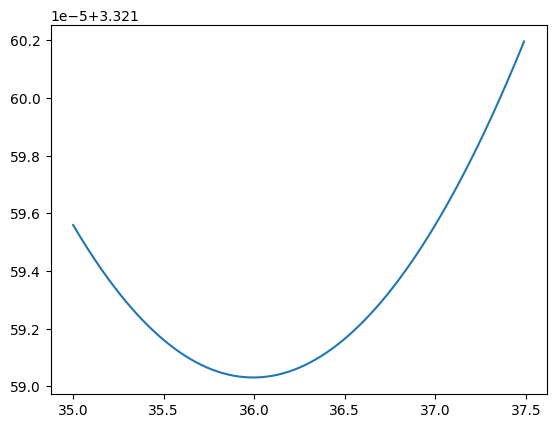

In [236]:
sns.lineplot(data=data)

Through trial and error we can try and find an r value that gives us a minimum RSME. That being said, we're still getting an awful RMSE value. We need to do some work to try and reduce this.

Let's try and take all of the columns into account when training the model

In [239]:
columns = df.columns
columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences'],
      dtype='object')

In [240]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
pstatus       object
medu           int64
fedu           int64
mjob          object
fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
dalc           int64
walc           int64
health         int64
absences       int64
dtype: object

In [241]:
df.school.unique()

array(['GP', 'MS'], dtype=object)

In [244]:
df_new = df.copy()
df_new

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [247]:
schools = df.school.unique()
schools

array(['GP', 'MS'], dtype=object)

In [ ]:
for s in schools:
    df[f"school_{s}"] = df